# look at what rescale is actually doing

In [3]:
from IPython.display import display, Image
from keras.preprocessing import image as kimage
import skimage.io


from keras.optimizers import Adam
from keras.models import Model
from keras import backend as K
from datetime import datetime
import distutils.dir_util
from keras.callbacks import CSVLogger
from keras.layers import Dense, Input, Lambda, BatchNormalization, Conv2D, ZeroPadding2D, MaxPooling2D, AveragePooling2D, Activation, Flatten, Dropout
from keras.applications.resnet50 import ResNet50
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import glob 
import os
import numpy as np

from keras import __version__
print(__version__)

from __future__ import division



2.0.4


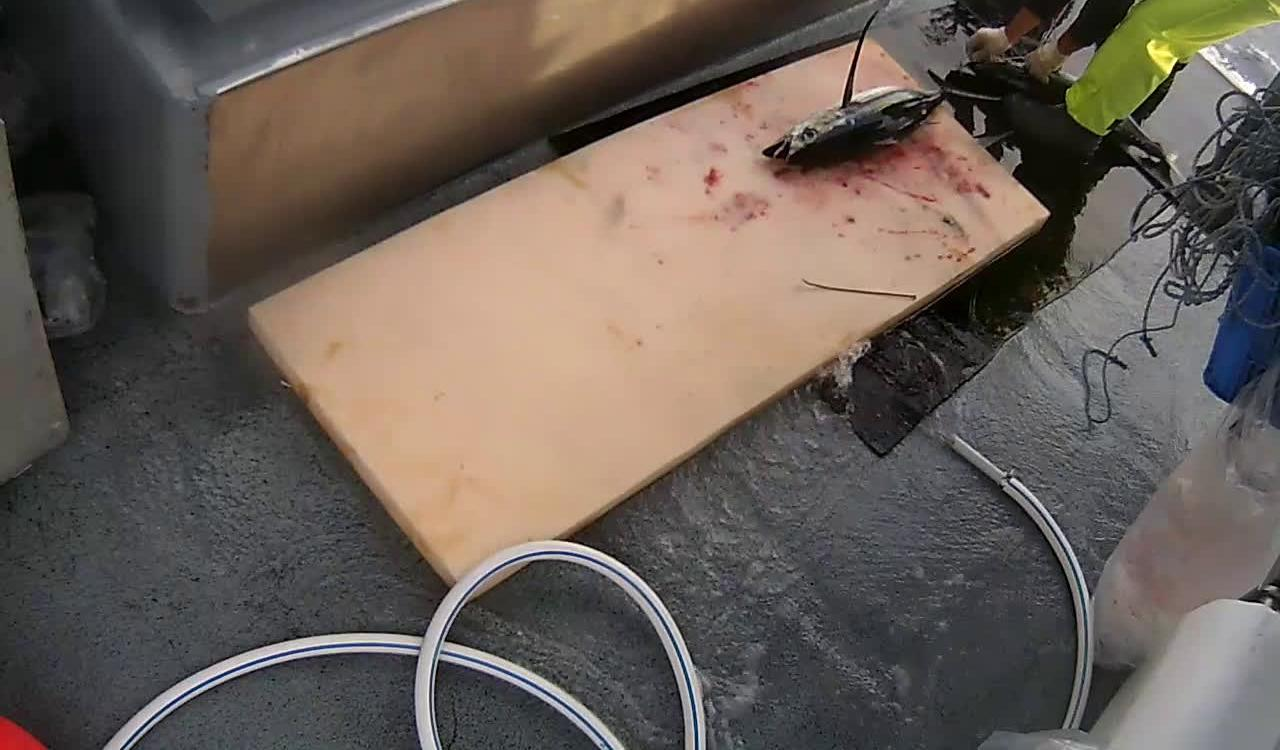

In [4]:

img_dir = '/home/ubuntu/data/fish/valid_c/ALB'
def preprocess_input(x, data_format=None):
    """Preprocesses a tensor encoding a batch of images.
    # Arguments
        x: input Numpy tensor, 4D.
        data_format: data format of the image tensor.
    # Returns
        Preprocessed tensor.
    """

    # 'RGB'->'BGR'
    x = x[:, :, ::-1]
    # Zero-center by mean pixel
    x[:, :, 0] -= 103.939
    x[:, :, 1] -= 116.779
    x[:, :, 2] -= 123.68
    return xImage(filename=img_dir + '/img_07885.jpg')

In [6]:
def preprocess_input(x, data_format=None):
    """Preprocesses a tensor encoding a batch of images.
    # Arguments
        x: input Numpy tensor, 4D.
        data_format: data format of the image tensor.
    # Returns
        Preprocessed tensor.
    """

    # 'RGB'->'BGR'
    x = x[:, :, ::-1]
    # Zero-center by mean pixel
    x[:, :, 0] -= 103.939
    x[:, :, 1] -= 116.779
    x[:, :, 2] -= 123.68
    return x

train_datagen_test = ImageDataGenerator(preprocessing_function=preprocess_input,
        rescale=1.25)
train_generator_test = train_datagen_test.flow_from_directory(
        '/home/ubuntu/data/fish/valid_c',
        target_size=(224, 224),
        batch_size=1,
        #batch_size=batch_size,
        shuffle=False,
        class_mode = 'categorical',
        save_to_dir = '/home/ubuntu/data/fish/output/',
        save_prefix = 'out_',
        save_format = 'jpeg')



Found 1 images belonging to 1 classes.


In [7]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_generator_test:
#     .flow(x, batch_size=1,
#                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i == 1 :
        break  # otherwise the generator would loop indefinitely



In [8]:
train_generator_test.filenames

['ALB/img_07885.jpg']

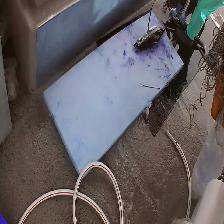

In [9]:
img_dir = '/home/ubuntu/data/fish/output'
Image(filename=img_dir + '/out__0_2664.jpeg') #out__0_8735.jpeg